Ironhack Data Analytics Bootcamp Berlin, 2021-02-24

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

# More on K-Means

In [10]:
import pandas as pd
from sklearn import datasets

In [15]:
data = datasets.load_wine()

In [16]:
data['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [17]:
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [26]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [27]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

In [28]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [30]:
X_prep_df = pd.DataFrame(X_prep, columns=data['feature_names'])
X_prep_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep_df)

# print the cluster centers
clusters = kmeans.cluster_centers_

print(clusters)

[[ 0.59147756 -0.32436906  1.34490077  0.25175579  0.99333031  0.84371458
   0.92884469 -0.12237604  0.13761844  0.02557888  0.70828955  0.64185034
   1.00327853]
 [ 0.02877558  1.05666617  0.08901746  0.39972231 -0.26270834 -1.18764705
  -1.29132829  0.73478767 -1.2028952   0.05630806 -0.8777228  -1.16979521
  -0.49796412]
 [-0.68815199 -0.86587116 -1.69237694 -0.58138787 -0.79550369 -0.22120754
  -0.07426899 -0.46048791 -0.31385814 -0.79739259  0.71832595  0.34325254
  -0.7236641 ]
 [-0.69634533  0.10356862 -0.05533288  0.28730677 -0.40313502  0.45372181
   0.45840358 -0.56787084  0.40200861 -0.83045392  0.14734897  0.61860727
  -0.66950187]
 [-1.08833361 -0.52400154  0.07630323  0.46369607 -0.65956635 -0.60314437
  -0.42529786  1.07812028 -0.52034416 -0.86374948  0.55789073 -0.24986507
  -0.6679884 ]
 [ 0.3384594   0.84639083  0.35295997  0.72913193  0.12346503 -0.83524129
  -1.16155132  0.64828079 -0.37692524  1.77902162 -1.47713011 -1.38494474
  -0.30978078]
 [-1.0908847  -0.42760

In [41]:
KMeans()

KMeans()

#### How does k-Means know, which is the best model?

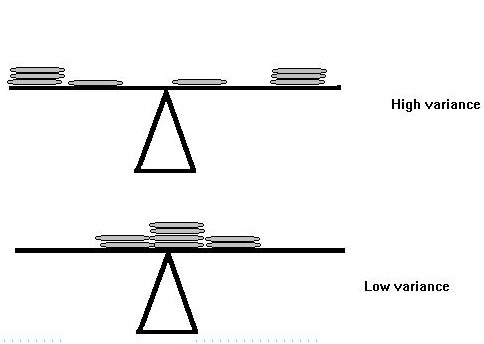

In [43]:
# Inertia is variance but in n-dimensions
Image("inertia_scale.jpg")

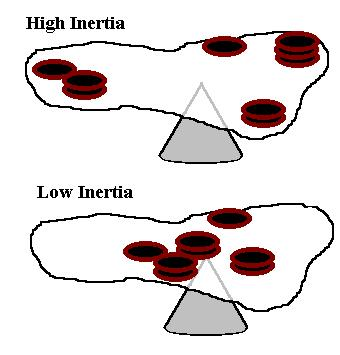

In [44]:
# show inertia on a plate
# source: http://ordination.okstate.edu/inertia.htm
Image("inertia_plate.jpg")

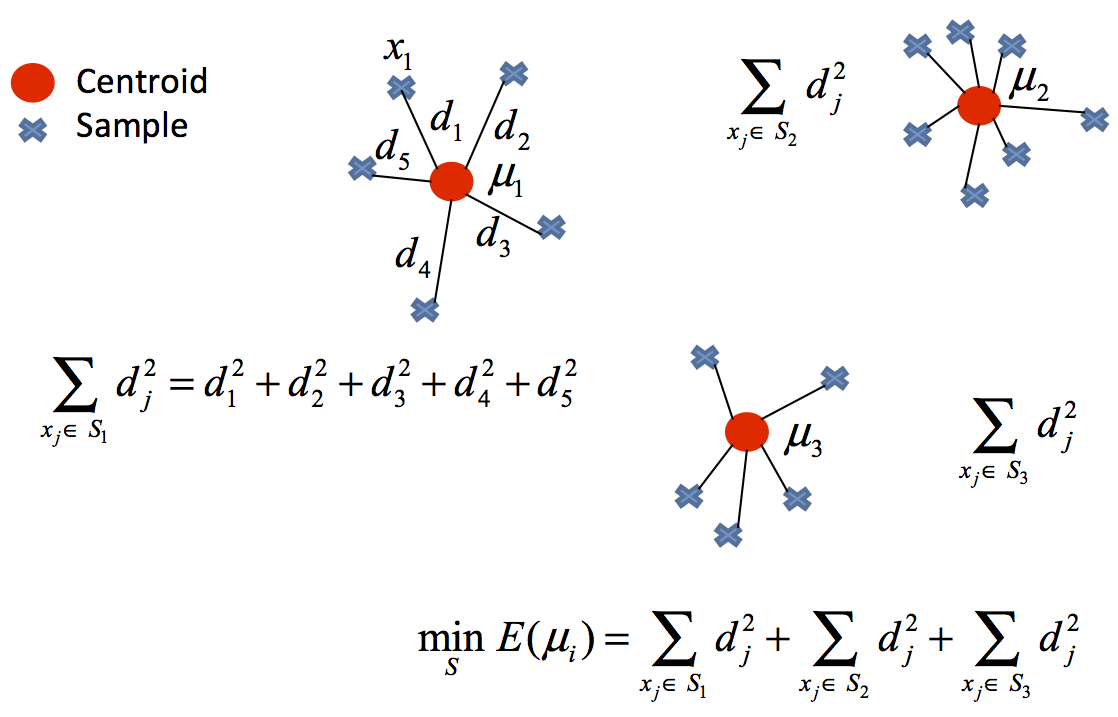

In [45]:
Image("inertia_sum_of_squares.png")

In [46]:
kmeans.inertia_

938.6711756898961

## For activity 2

Text(0, 0.5, 'inertia')

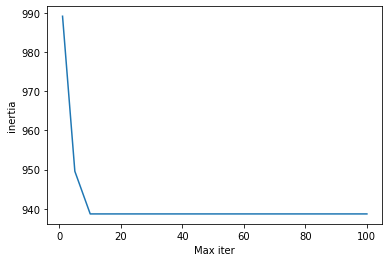

In [51]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=8,
                    random_state=1234,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

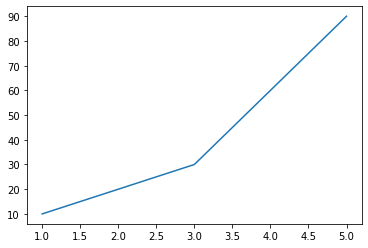

In [48]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[10,20,30,60,90])

# Let's move on!

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep_df)

# print the cluster centers
clusters_coordinates = kmeans.cluster_centers_

In [56]:
clusters_coordinates

array([[ 0.59147756, -0.32436906,  1.34490077,  0.25175579,  0.99333031,
         0.84371458,  0.92884469, -0.12237604,  0.13761844,  0.02557888,
         0.70828955,  0.64185034,  1.00327853],
       [ 0.02877558,  1.05666617,  0.08901746,  0.39972231, -0.26270834,
        -1.18764705, -1.29132829,  0.73478767, -1.2028952 ,  0.05630806,
        -0.8777228 , -1.16979521, -0.49796412],
       [-0.68815199, -0.86587116, -1.69237694, -0.58138787, -0.79550369,
        -0.22120754, -0.07426899, -0.46048791, -0.31385814, -0.79739259,
         0.71832595,  0.34325254, -0.7236641 ],
       [-0.69634533,  0.10356862, -0.05533288,  0.28730677, -0.40313502,
         0.45372181,  0.45840358, -0.56787084,  0.40200861, -0.83045392,
         0.14734897,  0.61860727, -0.66950187],
       [-1.08833361, -0.52400154,  0.07630323,  0.46369607, -0.65956635,
        -0.60314437, -0.42529786,  1.07812028, -0.52034416, -0.86374948,
         0.55789073, -0.24986507, -0.6679884 ],
       [ 0.3384594 ,  0.846390

In [57]:
clusters = kmeans.predict(X_prep)

In [62]:
clusters

array([7, 7, 7, 7, 0, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 3,
       7, 3, 0, 0, 7, 7, 0, 7, 0, 7, 7, 0, 0, 7, 0, 0, 2, 7, 7, 3, 7, 3,
       7, 0, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 0, 7, 2, 4, 4, 2, 3, 4, 3,
       2, 2, 4, 6, 4, 3, 3, 0, 3, 2, 2, 4, 6, 3, 2, 3, 4, 1, 3, 2, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 6, 3, 2, 3, 3, 2, 2, 3, 2, 2, 4, 2, 4, 2, 3,
       6, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 4, 3, 4, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [60]:
pd.Series(clusters).value_counts().sort_index()

0    18
1    23
2    17
3    29
4    23
5    26
6     4
7    38
dtype: int64

In [63]:
X_prep_df['cluster_id'] = clusters

In [64]:
X_prep_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_id
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,7
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,7
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,7
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,7
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,5
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,5
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,5
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,5


In [66]:
# filter for Wines that were associated with cluster 5
X_prep_df[X_prep_df['cluster_id']==5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_id
144,-0.927212,1.385679,-0.608676,-0.298767,0.860705,-1.466313,-1.254225,-0.578985,-0.790013,1.363422,-1.348885,-0.863971,0.344265,5
148,0.394521,0.811175,0.049285,0.602088,-0.543562,-0.585031,-1.274305,0.710264,-0.597284,1.454261,-1.787619,-1.400699,-0.308556,5
149,0.098058,1.403632,-0.023821,0.602088,0.930918,-1.418243,-0.641805,-0.176095,-0.790013,1.878180,-1.699872,-1.810307,-0.627005,5
150,0.616869,0.703455,0.926567,1.352801,1.633052,-1.434267,-0.461091,-1.143031,-0.597284,1.532124,-1.612125,-1.852681,-0.786230,5
151,-0.260169,0.299507,0.414820,0.752231,0.860705,-1.306080,-0.671924,-0.981875,-0.579763,2.483778,-2.094732,-1.612565,-0.849920,5
152,0.135116,-0.391694,1.401762,1.803228,1.141558,-0.152402,-0.752242,-0.820719,-0.054137,0.883269,-1.524378,-1.810307,-1.025067,5
153,0.283348,0.865035,-0.316249,-0.298767,-0.122282,-0.793334,-1.204027,1.999513,0.489009,2.362658,-1.743745,-1.556068,-0.228944,5
154,-0.519575,-0.939268,-0.974210,0.151661,0.228785,-1.306080,-1.455019,1.354888,-0.334471,1.099554,-1.655999,-1.499570,-0.340401,5
155,0.209232,2.561618,-0.170035,0.752231,-0.473348,-0.889474,-1.404820,1.999513,-0.071658,1.229325,-1.568252,-1.598441,-0.069719,5
156,1.036859,1.601118,0.049285,0.001518,-0.754202,-0.793334,-1.204027,0.951998,-0.054137,1.709478,-1.699872,-1.372450,-0.849920,5


Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

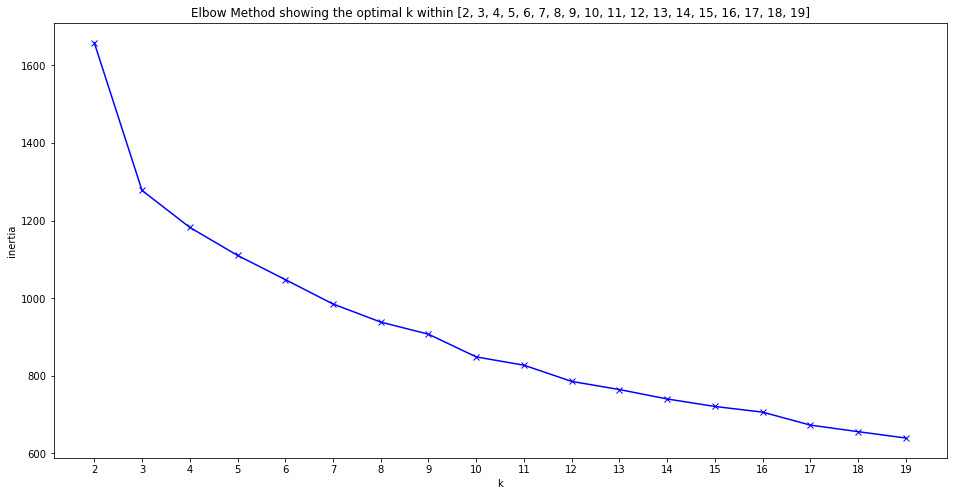

In [75]:
import numpy as np
K = range(2,20)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(X_prep)
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

# Silhouette Score

* Inertia was the metric that KMeans used to find the optimum centroids
* what Silhouette score does: **how similar is an observation to its own cluster compared to other clusters**
* $S_i = \frac{(b_i - a_i)}{\text{max}(a_i,b_i)}$
    * a: mean intra-cluster distance (the average distance between the i-th observation and every other observation in the cluster where i belongs to)
    * b: the mean **nearest** inter cluster distance (the average distance between the i_th observation of the nearest cluster that i is **not part of**)

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

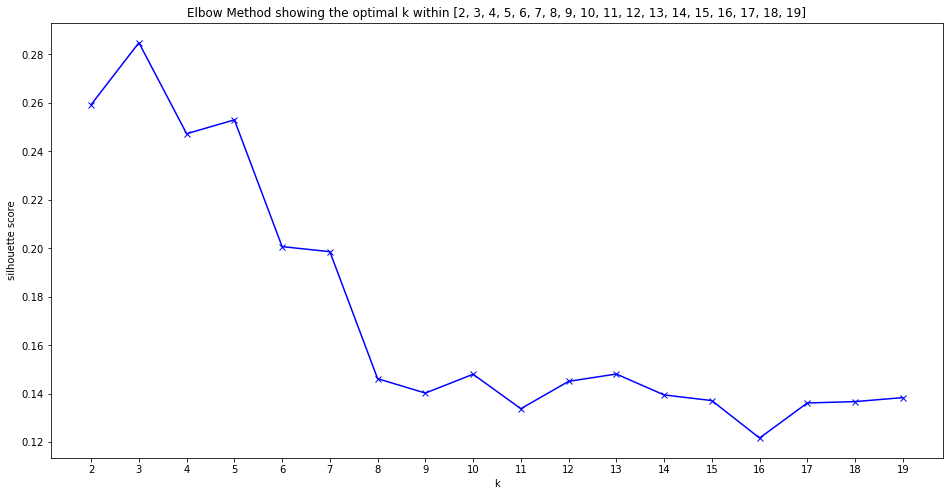

In [76]:
from sklearn.metrics import silhouette_score

import numpy as np
K = range(2,20)
silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                   )
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep,
                                     kmeans.predict(X_prep)
                                    )
                   )
    
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

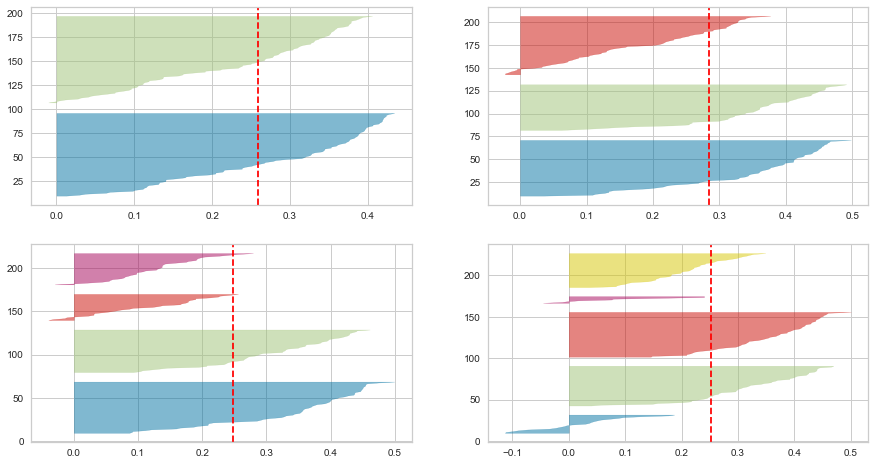

In [78]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k,
                random_state=1234)
    q, mod = divmod(k, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_prep)